# Unsupervised Contrasitve Loss Demo

Issue #520

Dante Basile

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.resnet50 import preprocess_input

from unsupcon_loss import (
    contrastive_loss,
    get_aug_seq,
    get_pairwise_sim,
    model_loss,
    sim,
)

## Use resnet50.preprocess_input
### Show Augmented Data

(100, 32, 32, 3)
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


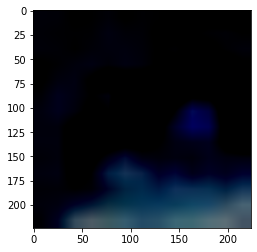

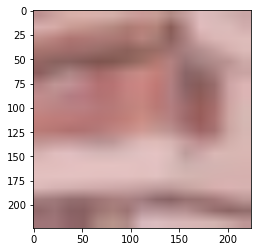

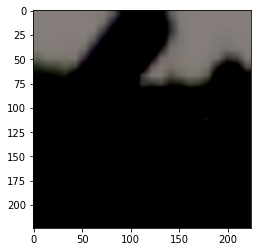

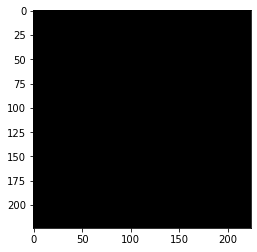

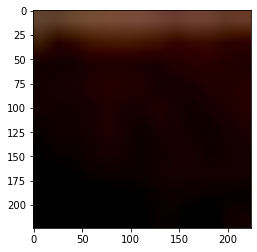

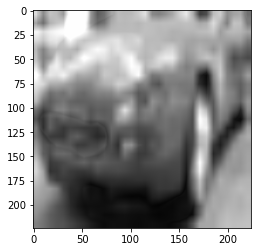

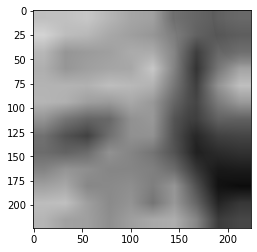

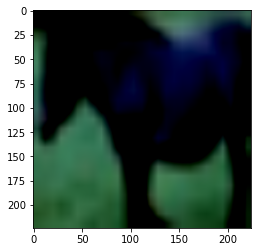

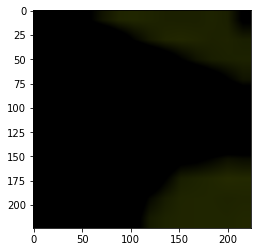

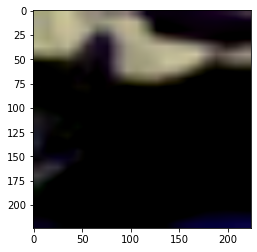

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X = X_train[:100]
X = preprocess_input(X)
X = tf.math.multiply(1.0 / 255.0, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    aug_seq = get_aug_seq(np.size(X, 1), np.size(X, 2))
    batch = tf.map_fn(aug_seq, batch)
    for img in batch:
        plt.figure()
        plt.imshow(tf.clip_by_value(img, 0.0, 1.0))  # clamp for imshow

### Demonstrate Loss Functions

In [3]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(
        batch_l, axis=2
    )  # this is a bad encoding for demo purposes only
    batch_z = tf.concat([batch_z, batch_z], 0)
    print(tf.shape(batch_z))
    s = get_pairwise_sim(batch_z, N)
    print(f"sim slice: {s[:2]}")
    print(f"sim shape: {s.shape}")
    cl = contrastive_loss(s, 0, 0, N)
    print(f"contrastive loss: {cl}")
    L = model_loss(batch_z, N)
    print(f"model loss L: {L}")

tf.Tensor([  20 1024], shape=(2,), dtype=int32)
sim slice: [[ 1.0000001   0.06441945 -0.40183944  0.4844646   0.04830697  0.09801984
  -0.06811368 -0.12069042 -0.12199766 -0.09320318  1.0000001   0.06441945
  -0.40183944  0.4844646   0.04830697  0.09801984 -0.06811368 -0.12069042
  -0.12199766 -0.09320318]
 [ 0.06441945  1.         -0.00891178 -0.04722429  0.18665135 -0.01126016
   0.227519   -0.01572655  0.14104201 -0.14695238  0.06441945  1.
  -0.00891178 -0.04722429  0.18665135 -0.01126016  0.227519   -0.01572655
   0.14104201 -0.14695238]]
sim shape: (20, 20)
contrastive loss: 2.043300151824951
model loss L: 3.1468095779418945


## Do not use resnet50.preprocess_input
### Show Augmented Data

(100, 32, 32, 3)


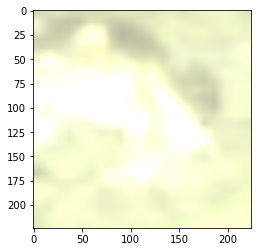

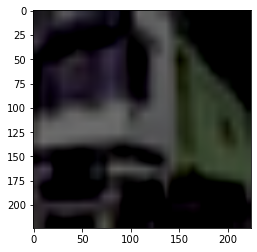

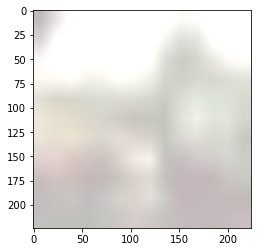

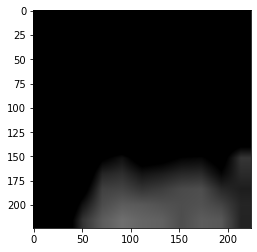

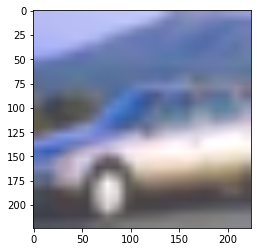

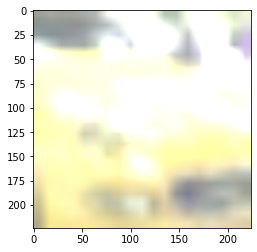

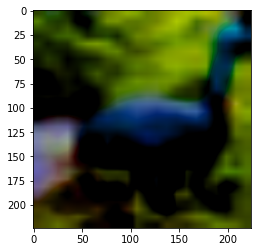

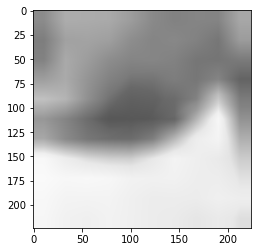

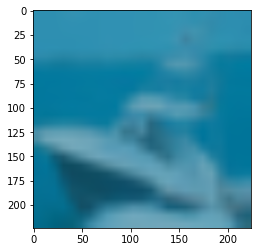

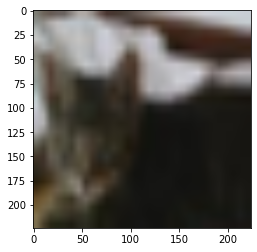

In [4]:
X = X_train[:100]
X = tf.math.multiply(1.0 / 255, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    batch = tf.map_fn(aug_seq, batch)
    for img in batch:
        plt.figure()
        plt.imshow(tf.clip_by_value(img, 0.0, 1.0))  # clamp for imshow

### Demonstrate Loss Functions

In [5]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(
        batch_l, axis=2
    )  # this is a bad encoding for demo purposes only
    batch_z = tf.concat([batch_z, batch_z], 0)
    print(tf.shape(batch_z))
    print(tf.shape(batch_z))
    s = get_pairwise_sim(batch_z, N)
    print(f"sim slice: {s[:2]}")
    print(f"sim shape: {s.shape}")
    cl = contrastive_loss(s, 0, 0, N)
    print(f"contrastive loss: {cl}")
    L = model_loss(batch_z, N)
    print(f"model loss L: {L}")

tf.Tensor([  20 1024], shape=(2,), dtype=int32)
tf.Tensor([  20 1024], shape=(2,), dtype=int32)
sim slice: [[1.         0.8707794  0.72607917 0.92626184 0.8129478  0.8374222
  0.88093984 0.83906555 0.89032537 0.6510596  1.         0.8707794
  0.72607917 0.92626184 0.8129478  0.8374222  0.88093984 0.83906555
  0.89032537 0.6510596 ]
 [0.8707794  0.9999999  0.76015204 0.88075596 0.8441278  0.84828204
  0.89051485 0.8232098  0.8619512  0.71471506 0.8707794  0.9999999
  0.76015204 0.88075596 0.8441278  0.84828204 0.89051485 0.8232098
  0.8619512  0.71471506]]
sim shape: (20, 20)
contrastive loss: 2.783541202545166
model loss L: 2.963444948196411
